In [108]:
#!pip install dask==2023.3.2
#!pip install dask==2024.2.0
#!pip install bokeh==2.4.2
#!pip install bokeh==2.4.3
#!pip install bokeh==3.3.4
#!pip install FuzzyTM blosc2 cython requests_mock pyqt5 pyqtwebengine
#!pip install numpy==1.23
#!pip install black==22.3.0
#!pip install clyent==1.2.1
#!pip install jedi==0.17.2
#!pip install blosc2==2.0.0

!pip install git+https://github.com/OSOceanAcoustics/echoshader.git
!pip install -r echoshader_requirements.txt
import shutil
import traceback
import json
import os
import numpy as np
import echopype as ep
from importlib.metadata import version
from dask import delayed
from dask.utils import memory_repr
import dask

  Cloning https://github.com/OSOceanAcoustics/echoshader.git to /tmp/pip-req-build-y93bhewj
  Running command git clone --filter=blob:none --quiet https://github.com/OSOceanAcoustics/echoshader.git /tmp/pip-req-build-y93bhewj
  Resolved https://github.com/OSOceanAcoustics/echoshader.git to commit 9bcf22d8de93533101314085c0310bb73119b093
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


  Obtaining dependency information for bokeh<3.4.0,>=3.2.0 from https://files.pythonhosted.org/packages/84/60/33f23dbb15fcd785d6287bdd6fa8c9d836dacb40e21c14aad41a57a0ec0f/bokeh-3.2.2-py3-none-any.whl.metadata
  Using cached bokeh-3.2.2-py3-none-any.whl.metadata (12 kB)


Using cached bokeh-3.2.2-py3-none-any.whl (7.8 MB)
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
      Successfully uninstalled bokeh-3.3.4
  Obtaining dependency information for bokeh==3.3.4 from https://files.pythonhosted.org/packages/39/ba/aefd7aacc9e086e2c7f3bb42e99cb8e2a8f24dcb4bf78519ef25a9102988/bokeh-3.3.4-py3-none-any.whl.metadata
  Using cached bokeh-3.3.4-py3-none-any.whl.metadata (12 kB)


  Obtaining dependency information for holoviews==1.18.3 from https://files.pythonhosted.org/packages/d0/ab/bc778fd2011a212e147f69e5d055a628280764453962cc75989f565469ef/holoviews-1.18.3-py2.py3-none-any.whl.metadata
  Using cached holoviews-1.18.3-py2.py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for jedi==0.19.1 from https://files.pythonhosted.org/packages/20/9f/bc63f0f0737ad7a60800bfd472a4836661adae21f9c2535f3957b1e54ceb/jedi-0.19.1-py2.py3-none-any.whl.metadata
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for panel==1.3.8 from https://files.pythonhosted.org/packages/24/5d/d0f66d05f20068b40df46b84bc68054f6fce5e458d58e9a9585eb0d601e2/panel-1.3.8-py2.py3-none-any.whl.metadata
  Using cached panel-1.3.8-py2.py3-none-any.whl.metadata (24 kB)
  Obtaining dependency information for parso==0.8.3 from https://files.pythonhosted.org/packages/05/63/8011bd08a4111858f79d2b09aad86638490d62fbf881c44e434a6dfca87b/parso-0.

Using cached bokeh-3.3.4-py3-none-any.whl (6.8 MB)
Using cached holoviews-1.18.3-py2.py3-none-any.whl (4.3 MB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
Using cached panel-1.3.8-py2.py3-none-any.whl (20.8 MB)
Using cached parso-0.8.3-py2.py3-none-any.whl (100 kB)
  Attempting uninstall: parso
    Found existing installation: parso 0.7.1
    Uninstalling parso-0.7.1:
      Successfully uninstalled parso-0.7.1
  Attempting uninstall: jedi
    Found existing installation: jedi 0.17.2
    Uninstalling jedi-0.17.2:
      Successfully uninstalled jedi-0.17.2
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.2.2
    Uninstalling bokeh-3.2.2:
      Successfully uninstalled bokeh-3.2.2
  Attempting uninstall: panel
    Found existing installation: panel 1.2.3
    Uninstalling panel-1.2.3:
      Successfully uninstalled panel-1.2.3
  Attempting uninstall: holoviews
    Found existing installation: holoviews 1.17.1
    Uninstalling holoviews-1.17.1:
      Success

In [109]:
from pathlib import Path
import itertools as it
import bokeh
import datetime as dt
from dateutil import parser as dtparser
import pandas as pd
import fsspec
import xarray as xr
import matplotlib.pyplot as plt
import hvplot.xarray
import csv
import echopype as ep
import os
import warnings
from echopype import open_raw
import dask
from dask.distributed import Client, LocalCluster, performance_report
import traceback

from tqdm import tqdm
import requests
from datetime import datetime
from dateutil import parser as dtparser
from urllib.parse import urljoin
from datetime import timedelta


warnings.simplefilter("ignore", category=DeprecationWarning)
fs = fsspec.filesystem('https')

In [110]:
version('dask')

'2024.2.1'

In [111]:
version('bokeh')

'3.3.4'

In [112]:
#cluster = LocalCluster()
#client = Client(cluster)
client = Client(processes=False)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://10.1.22.254:33965/status,
Dashboard: http://10.1.22.254:33965/status,Workers: 1
Total threads: 64,Total memory: 245.77 GiB
Status: running,Using processes: False
Comm: inproc://10.1.22.254/7759/19,Workers: 1
Dashboard: http://10.1.22.254:33965/status,Total threads: 64
Started: Just now,Total memory: 245.77 GiB
Comm: inproc://10.1.22.254/7759/22,Total threads: 64
Dashboard: http://10.1.22.254:37409/status,Memory: 245.77 GiB
Nanny: None,


In [113]:
fs = fsspec.filesystem('https')
base_dpath = Path('./exports')
base_dpath.mkdir(exist_ok=True)

# Create a directory for all files
output_dpath = Path(base_dpath / 'ooimooring_allfiles')
output_dpath.mkdir(exist_ok=True)


In [114]:
ooi_raw_url = "https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143/"

In [115]:
def parse_exception(exception):
    exc_dict = {
        'type': type(exception).__name__,
        'value': str(exception),
        'traceback': "".join(
            traceback.format_exception(
                type(exception), exception, exception.__traceback__
            )
        ),
    }
    return exc_dict

In [116]:
def in_range(raw_file: str, start: datetime, end: datetime) -> bool:
    file_name = Path(raw_file).name
    
    if 'OOI-' in file_name:
        format_string = "OOI-D%Y%m%d-T%H%M%S.raw"
        file_datetime = datetime.strptime(file_name, format_string)
        return start <= file_datetime <= end

    return False

In [117]:
start_datetime = dt.datetime(2017, 8, 20, 0, 0)
end_datetime = dt.datetime(2017, 8, 21, 0, 0)

In [118]:
desired_day_urls = []
current_date = start_datetime

while current_date <= end_datetime:
    day_url = urljoin(
        ooi_raw_url,
        f"{current_date.year}/{current_date.month:02d}/{current_date.day:02d}"
    )
    desired_day_urls.append(day_url)
    current_date += timedelta(days=1)

In [119]:
all_raw_file_urls = it.chain.from_iterable([fs.glob(f"{day_url}/*.raw") for day_url in tqdm(desired_day_urls) if  requests.get(day_url).status_code ==200 ])

100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.35it/s]


In [120]:
desired_raw_file_urls = list(filter(
    lambda raw_file: in_range(
        raw_file,
        start_datetime-dt.timedelta(hours=0),  # 3 hour buffer to select files
        end_datetime+dt.timedelta(hours=0)
    ),
    all_raw_file_urls
))
print(f"There are {len(desired_raw_file_urls)} raw files within the specified datetime range.")

There are 16 raw files within the specified datetime range.


In [121]:

def open_and_save(raw_file, sonar_model, use_swap, save_path, open_kwargs={}, save_kwargs={}):
    try:
        print('open and save')
        ed = ep.open_raw(raw_file=raw_file, sonar_model=sonar_model, use_swap=use_swap, **open_kwargs)
        #ed.to_zarr(save_path=save_path, overwrite=True)
        return ed
        #return ed.converted_raw_path
    except Exception as e:
        print('exception')
        exc_dict = parse_exception(e)
        print("Error with Exception: ", e)

In [122]:
def get_ed_list(desired_raw_file_urls):
    ed_list = []
    paths = []
    for raw_file_url in tqdm(desired_raw_file_urls):
        ed = client.submit(open_and_save,
                       raw_file=raw_file_url,
                       sonar_model='ek60',
                       use_swap=True,
                       save_path=output_dpath 
                       )
        ed_list.append(ed)
        paths.append(str(raw_file_url))
    return ed_list, paths

In [123]:
def create_year_dataframe(final_df):
    df = pd.DataFrame()
    count =0
    t = []
    for index,row in final_df.iterrows():
        df.at[count, 'Echodata_object'] = row['Echodata']
        df.at[count, 'Path'] = str(row['Object_Name'])
        df.at[count, 'Year'] = str(row['Object_Name'].split('/')[-1].split('-')[1].split('D')[1][0:4])
        df.at[count, 'Month'] = str(row['Object_Name'].split('/')[-1].split('-')[1].split('D')[1][4:6])
        channels = list(row['Echodata'].platform.channel.to_pandas())
        df.at[count, 'Channel1'] = channels[0]
        df.at[count, 'Channel2'] = channels[1]
        df.at[count, 'Channel3'] = channels[2]
        count = count +1

    print(df.shape)
    return df

In [124]:
year_df = pd.DataFrame()
year_df['Year'] = [i.split('/')[-1].split('-')[1].split('D')[1][0:4] for i in desired_raw_file_urls]
year_df['Url'] = desired_raw_file_urls
print(year_df.shape)
year_df.head(2)

(16, 2)


,Year,Url
0,2017,https://rawdata.oceanobservatories.org/files/C...
1,2017,https://rawdata.oceanobservatories.org/files/C...


In [125]:
%%time
import warnings
warnings.simplefilter('ignore')
years =list(year_df.Year.unique())
print(years)
batch_size = 50
local_obj = None

fs_local = fsspec.filesystem('file')
prefix = "echo_object"
count =0
final_dict = {}
for year in years:
    print("Year :" ,year)
    year_wise_url_list = year_df.loc[year_df['Year']==year]['Url']
    ed_list, paths = get_ed_list(year_wise_url_list)
    list_of_ed = client.gather(ed_list)
    print('Done')
    ed_list = list_of_ed
    ed_df = pd.DataFrame()
    ed_df['Echodata'] = ed_list
    ed_df['Object_Name'] = paths
    print(ed_df.shape)
    final_df = ed_df.dropna(axis =0)
    print(final_df.shape)
    df = create_year_dataframe(final_df)
    print('Dataframe for ', year, 'is', df.shape)
    channel_list = list(df.loc[df.Year == year]['Channel1'].value_counts().reset_index()['index'])
    print(channel_list)
    for channel in channel_list:
        print('Channel',channel)
        ed_lists = list(df.loc[(df['Year'] == year) & (df['Channel1'] == channel)]['Echodata_object'])
        ed = ed_lists
        print('Number of echodata objects with this channel in year ',year, 'are ', len(ed_lists))
        try:
            while len(ed) > 1 :
                if len(ed) <= batch_size :
                    print(len(ed))
                    final_ed = ep.combine_echodata(ed)
                    break
                    
                batches = [ed[i:i + batch_size] for i in range(0, len(ed), batch_size)]
                ed = [ep.combine_echodata(batch) for batch in tqdm(batches)]

            combined_ed_list = final_ed
        except Exception as e:
            print('Error with Exception:', e)
        
        final_dict["".join([prefix,'_',year,'_',channel])] = combined_ed_list
        count+=1

['2017']
Year : 2017


100%|█████████████████████████████████████████| 16/16 [00:00<00:00, 1005.44it/s]


open and save
open and save
open and save
open and save
open and save
open and save
open and save
open and save
open and save
open and save
open and save
open and save
open and save
open and save
open and save
open and save
Done
(16, 2)
(16, 2)
(16, 7)
Dataframe for  2017 is (16, 7)
['GPT  38 kHz 00907208dd13 5-1 OOI.38|200']
Channel GPT  38 kHz 00907208dd13 5-1 OOI.38|200
Number of echodata objects with this channel in year  2017 are  16
16
CPU times: user 19.8 s, sys: 10.1 s, total: 29.9 s
Wall time: 19.6 s


In [126]:
final_dict

{'echo_object_2017_GPT  38 kHz 00907208dd13 5-1 OOI.38|200': <EchoData: standardized raw data from Internal Memory>
 Top-level: contains metadata about the SONAR-netCDF4 file format.
 ├── Environment: contains information relevant to acoustic propagation through water.
 ├── Platform: contains information about the platform on which the sonar is installed.
 │   └── NMEA: contains information specific to the NMEA protocol.
 ├── Provenance: contains metadata about how the SONAR-netCDF4 version of the data were obtained.
 ├── Sonar: contains sonar system metadata and sonar beam groups.
 │   └── Beam_group1: contains backscatter power (uncalibrated) and other beam or channel-specific data, including split-beam angle data when they exist.
 └── Vendor_specific: contains vendor-specific information about the sonar and the data.}

In [127]:
final_dict.keys()

dict_keys(['echo_object_2017_GPT  38 kHz 00907208dd13 5-1 OOI.38|200'])

# Initial Visualization

In [128]:
echodata = final_dict['echo_object_2017_GPT  38 kHz 00907208dd13 5-1 OOI.38|200']
print(f"Echodata size: {memory_repr(echodata.nbytes)}")
#client.close()

Echodata size: 6.6 GB


print(version('msgpack'))
!pip install --upgrade msgpack==1.0.5
print(version('msgpack'))
client.close()

In [129]:
echodata

<EchoData: standardized raw data from Internal Memory>
Top-level: contains metadata about the SONAR-netCDF4 file format.
├── Environment: contains information relevant to acoustic propagation through water.
├── Platform: contains information about the platform on which the sonar is installed.
│   └── NMEA: contains information specific to the NMEA protocol.
├── Provenance: contains metadata about how the SONAR-netCDF4 version of the data were obtained.
├── Sonar: contains sonar system metadata and sonar beam groups.
│   └── Beam_group1: contains backscatter power (uncalibrated) and other beam or channel-specific data, including split-beam angle data when they exist.
└── Vendor_specific: contains vendor-specific information about the sonar and the data.

In [130]:
ds_Sv = ep.calibrate.compute_Sv(echodata)
ds_Sv

<xarray.Dataset>
Dimensions:                        (channel: 3, ping_time: 91753,
                                    range_sample: 1072, filenames: 1)
Coordinates:
  * channel                        (channel) <U39 'GPT  38 kHz 00907208dd13 5...
  * ping_time                      (ping_time) datetime64[ns] 2017-08-20T00:0...
  * range_sample                   (range_sample) int64 0 1 2 ... 1069 1070 1071
  * filenames                      (filenames) int64 0
Data variables: (12/16)
    Sv                             (channel, ping_time, range_sample) float64 dask.array<chunksize=(1, 5924, 1072), meta=np.ndarray>
    echo_range                     (channel, ping_time, range_sample) float64 dask.array<chunksize=(1, 5924, 1072), meta=np.ndarray>
    frequency_nominal              (channel) float64 3.8e+04 1.2e+05 2e+05
    sound_speed                    (channel, ping_time) float64 1.494e+03 ......
    sound_absorption               (channel, ping_time) float64 0.009785 ... ...
    sa_correction                  (ping_time, channel) float64 0.0 0.0 ... 0.0
    ...                             ...
    angle_sensitivity_alongship    (channel) float64 21.9 23.0 23.0
    angle_sensitivity_athwartship  (channel) float64 21.9 23.0 23.0
    beamwidth_alongship            (channel) float64 7.1 7.0 7.0
    beamwidth_athwartship          (channel) float64 7.1 7.0 7.0
    source_filenames               (filenames) <U26 'SOURCE FILE NOT IDENTIFIED'
    water_level                    float64 0.0
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.8.3
    processing_time:              2024-03-11T08:28:45Z
    processing_function:          calibrate.compute_Sv

In [131]:
ds_Sv = ep.consolidate.swap_dims_channel_frequency(ds_Sv)

ds_Sv.Sv.sel(frequency_nominal=200000).plot(x='ping_time')

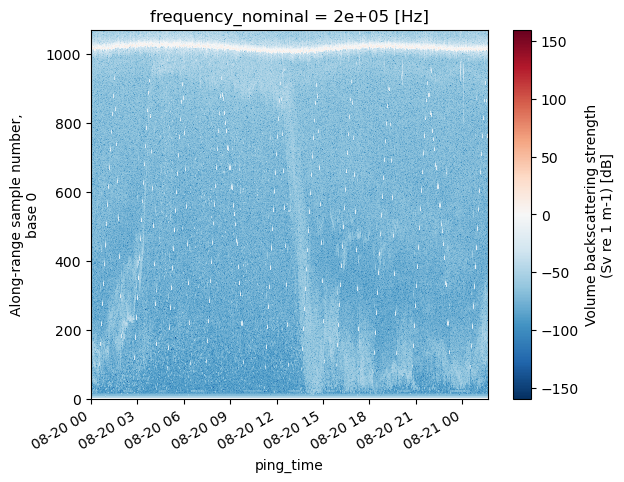

In [132]:
ds_Sv= ds_Sv.sortby('ping_time')
ds_Sv.Sv.sel(frequency_nominal=200000).plot(x='ping_time')

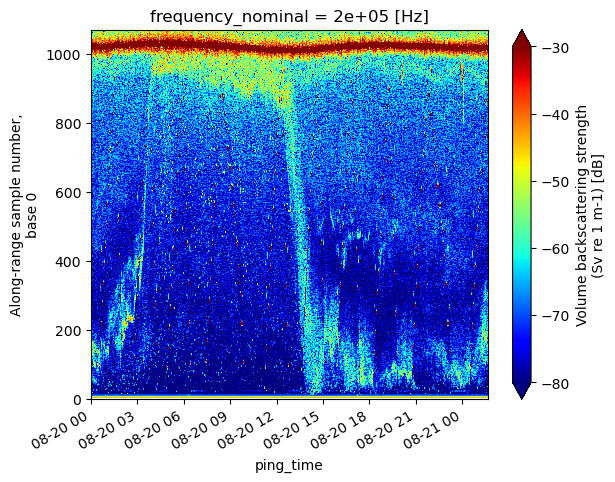

In [133]:
ds_Sv.Sv.sel(frequency_nominal=200000).plot.pcolormesh(
    x='ping_time', cmap = 'jet', vmin=-80, vmax=-30
);

# Echoshader Visualization

In [134]:
version('holoviews')

'1.18.3'

In [135]:
import echoshader
ds_MVBS = ep.commongrid.compute_MVBS(
    ds_Sv)
MVBS_ds = ds_MVBS
MVBS_ds

<xarray.Dataset>
Dimensions:            (channel: 3, ping_time: 4618, echo_range: 11,
                        frequency_nominal: 3)
Coordinates:
  * ping_time          (ping_time) datetime64[ns] 2017-08-20 ... 2017-08-21T0...
  * channel            (channel) object 'GPT  38 kHz 00907208dd13 5-1 OOI.38|...
  * echo_range         (echo_range) float64 0.0 20.0 40.0 ... 160.0 180.0 200.0
  * frequency_nominal  (frequency_nominal) float64 3.8e+04 1.2e+05 2e+05
Data variables:
    Sv                 (channel, ping_time, echo_range) float64 dask.array<chunksize=(3, 4618, 11), meta=np.ndarray>
    water_level        float64 0.0
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.8.3
    processing_time:              2024-03-11T08:33:33Z
    processing_function:          commongrid.compute_MVBS

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
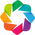

AttributeError: 'HoloMap' object has no attribute 'lbrt'

In [136]:
import panel
import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')
eg = MVBS_ds.eshader.echogram(
    channel = [
#        'GPT  18 kHz 009072058c8d 1-1 ES18-11',
#        'GPT  38 kHz 009072058146 2-1 ES38B',
#        'GPT 120 kHz 00907205a6d0 4-1 ES120-7C',
        'GPT  38 kHz 00907208dd13 5-1 OOI.38|200'
        ],
    cmap = [
        "#FFFFFF",
        "#9F9F9F", 
        "#5F5F5F", 
        "#0000FF", 
        "#00007F", 
        "#00BF00", 
        "#007F00", 
        "#FFFF00", 
        "#FF7F00", 
        "#FF00BF", 
        "#FF0000", 
        "#A6533C", 
        "#783C28",
    ], 
    vmin = -80, 
    vmax = -30,
)

panel.Row(eg)

In [ ]:
Sv_range_slider = MVBS_ds.eshader.Sv_range_slider

colormap = MVBS_ds.eshader.colormap

echogram_panel = panel.Row(
    panel.Column(
        Sv_range_slider,
        colormap,
    ),
    eg,
)

echogram_panel

In [57]:
tricolor_eg = MVBS_ds.eshader.echogram(
    channel=[
        "GPT 120 kHz 00907205a6d0 4-1 ES120-7C",
        "GPT  38 kHz 009072058146 2-1 ES38B",
        "GPT  18 kHz 009072058c8d 1-1 ES18-11",
    ],
    vmin = -80, 
    vmax = -30,
    rgb_composite = True,
)

panel.Row(tricolor_eg)

KeyError: "not all values found in index 'channel'. Try setting the `method` keyword argument (example: method='nearest')."

In [ ]:
Sv_range_slider = MVBS_ds.eshader.Sv_range_slider

tricolor_echogram_panel = panel.Row(
    Sv_range_slider,
    tricolor_eg,
)

tricolor_echogram_panel

In [ ]:
client.close()